In [3]:
!pip install pandas
!pip install numpy
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\UMC\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding="unicode_escape")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Cleaning

In [10]:
df.shape

(11251, 15)

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [20]:
df.dropna(subset=["Amount"],axis=0,inplace=True)

In [22]:
df.shape

(11239, 13)

In [23]:
data = df.isnull()
for i in data.columns.values.tolist():
    print(i)
    print(data[i].value_counts())

User_ID
User_ID
False    11239
Name: count, dtype: int64
Cust_name
Cust_name
False    11239
Name: count, dtype: int64
Product_ID
Product_ID
False    11239
Name: count, dtype: int64
Gender
Gender
False    11239
Name: count, dtype: int64
Age Group
Age Group
False    11239
Name: count, dtype: int64
Age
Age
False    11239
Name: count, dtype: int64
Marital_Status
Marital_Status
False    11239
Name: count, dtype: int64
State
State
False    11239
Name: count, dtype: int64
Zone
Zone
False    11239
Name: count, dtype: int64
Occupation
Occupation
False    11239
Name: count, dtype: int64
Product_Category
Product_Category
False    11239
Name: count, dtype: int64
Orders
Orders
False    11239
Name: count, dtype: int64
Amount
Amount
False    11239
Name: count, dtype: int64


In [24]:
df["Amount"] = df["Amount"].astype(int)
df["Amount"].dtypes

dtype('int32')

In [25]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
df.rename(columns={"Marital_Status":"Shaadi"},inplace=True)

In [32]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

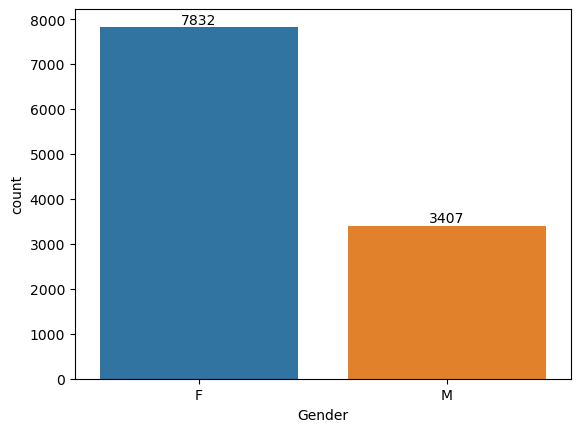

In [38]:
ax = sns.countplot(x="Gender",data=df)
for i in ax.containers:
    ax.bar_label(i)

In [39]:
sales_gen = df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by=["Amount"],ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


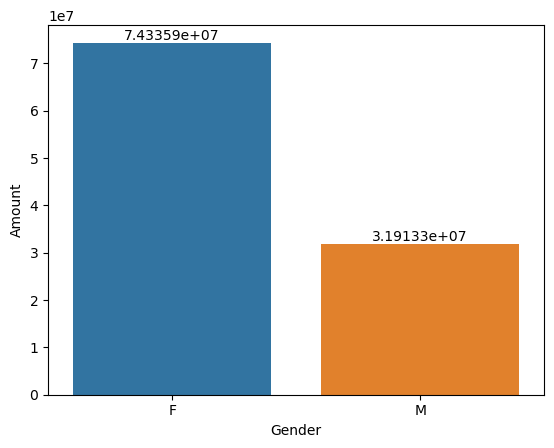

In [40]:
ax = sns.barplot(x="Gender",y="Amount",data=sales_gen)
for i in ax.containers:
    ax.bar_label(i)

# *From above graphs we can conclude that most of the Buyers are Females*

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [44]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


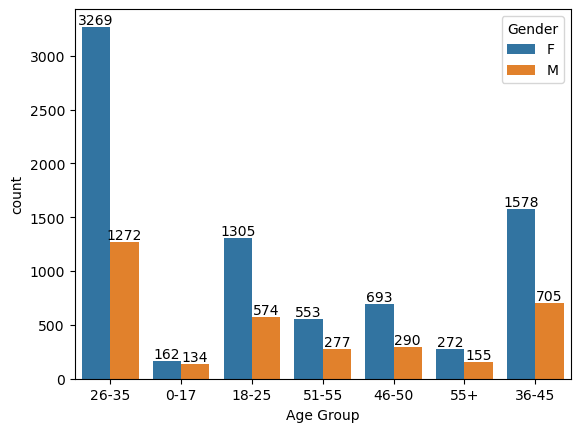

In [45]:
ax = sns.countplot(data=df,x="Age Group",hue="Gender")
for i in ax.containers:
    ax.bar_label(i)

In [48]:
sales_age = df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by=["Amount"],ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


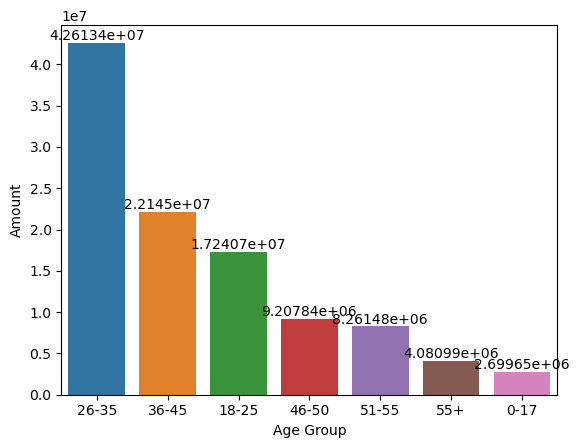

In [49]:
ax = sns.barplot(data=sales_age,x="Age Group",y="Amount")
for i in ax.containers:
    ax.bar_label(i)

# *From above Graphs we can see that Females of Age-Group 26--25 are the top Buyers*

In [58]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


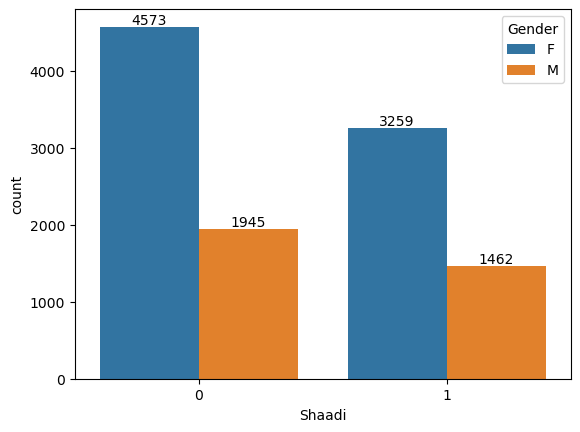

In [66]:
ax = sns.countplot(x="Shaadi",hue="Gender",data=df)
for i in ax.containers:
    ax.bar_label(i)

In [68]:
sales_life = df.groupby(["Shaadi","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_life

,Shaadi,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Shaadi', ylabel='Amount'>

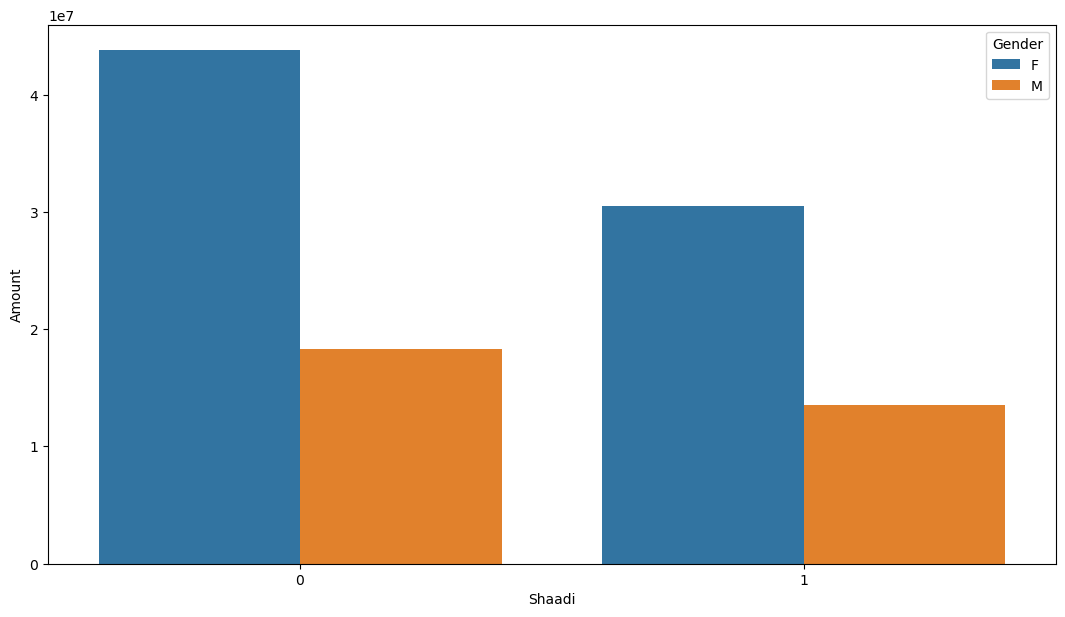

In [72]:
plt.figure(figsize=(13,7))
sns.barplot(data=sales_life,x="Shaadi",y="Amount",hue="Gender")

# *From above Graphs we can see that Females married Order most*

In [74]:
sales_orders = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
sales_orders.head()

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252


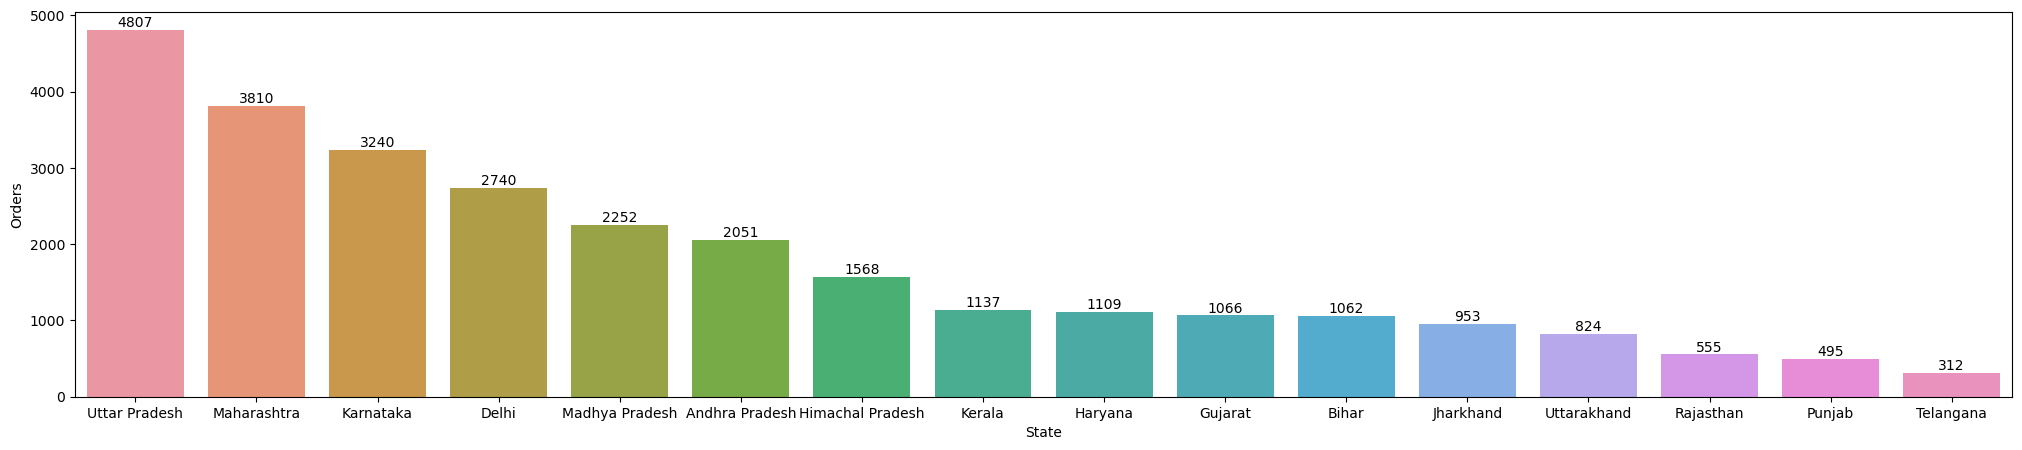

In [76]:
plt.figure(figsize=(25,5))
ax = sns.barplot(data=sales_orders,x="State",y="Orders")
for i in ax.containers:
    ax.bar_label(i)

In [77]:
sales_state = df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head()
sales_state.head()

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142


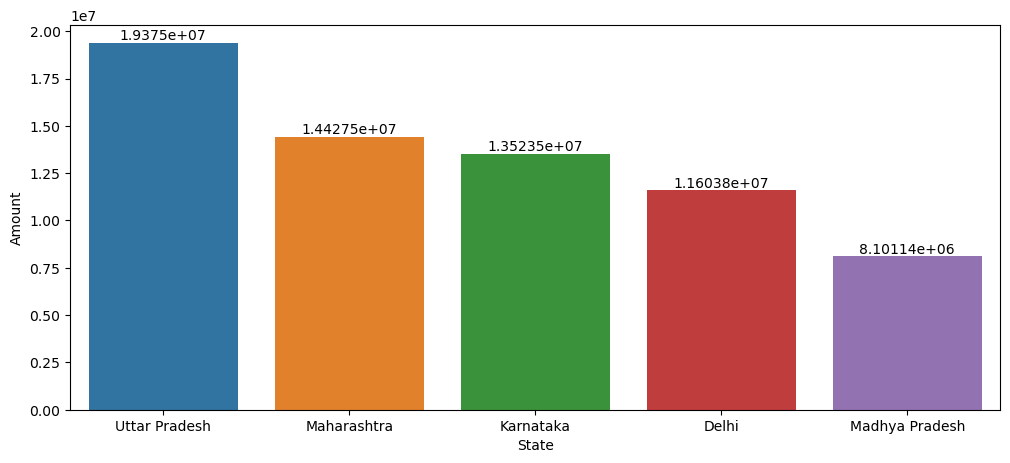

In [80]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=sales_state,x="State",y="Amount")
for i in ax.containers:
    ax.bar_label(i)

# *From above Graphs we can see that most of the orders are form Uttar Pradesh Maharashtra	Karnataka*

In [83]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


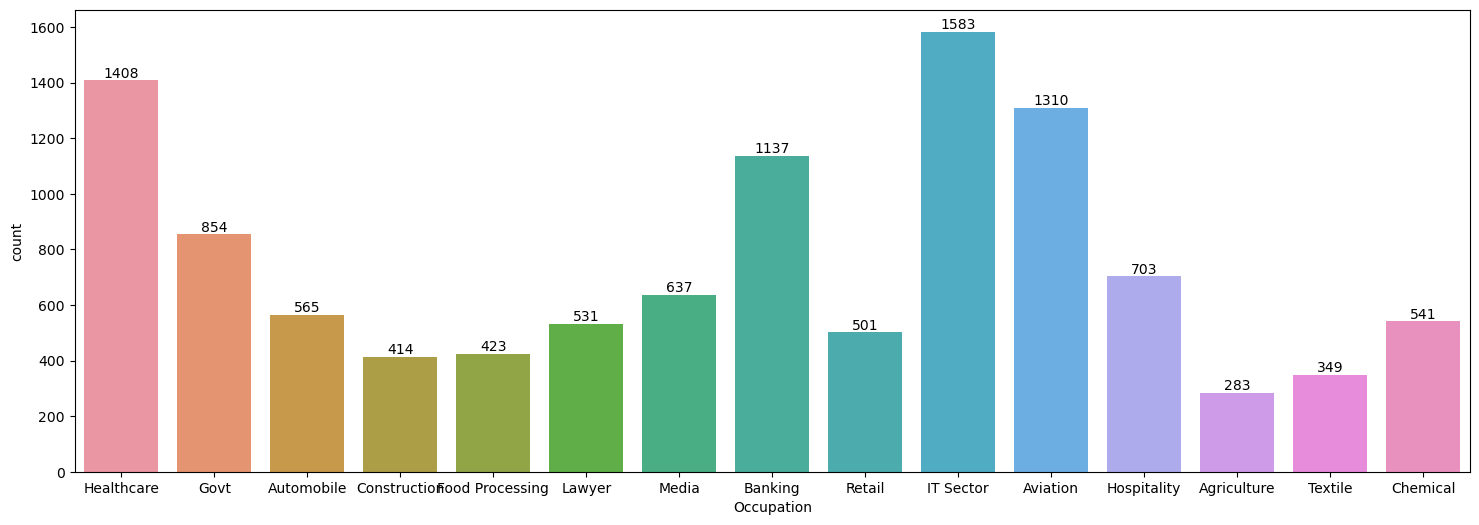

In [85]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data = df,x="Occupation")
for i in ax.containers:
    ax.bar_label(i)

In [86]:
sales_occ = df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head()
sales_occ.head()

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212


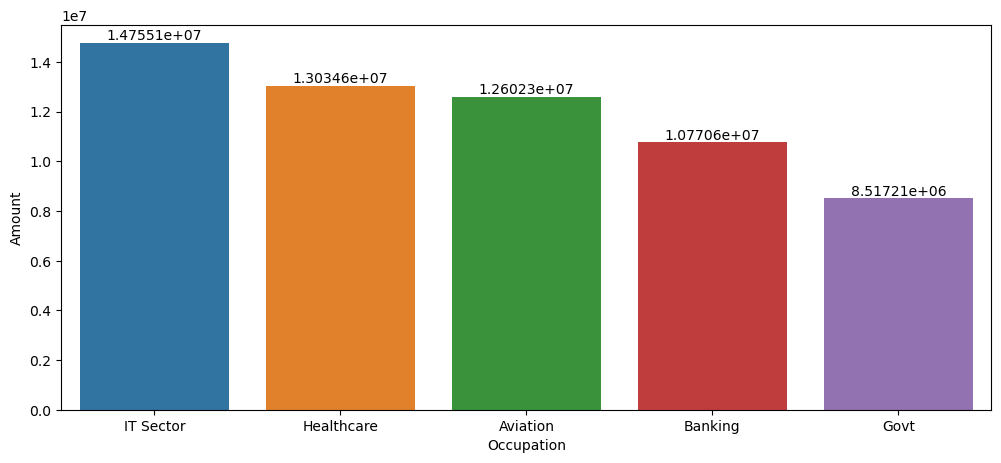

In [89]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data = sales_occ,x="Occupation",y="Amount")
for i in ax.containers:
    ax.bar_label(i)

# *Most of the buyers work in IT Sector , HealthCare , Aviation*

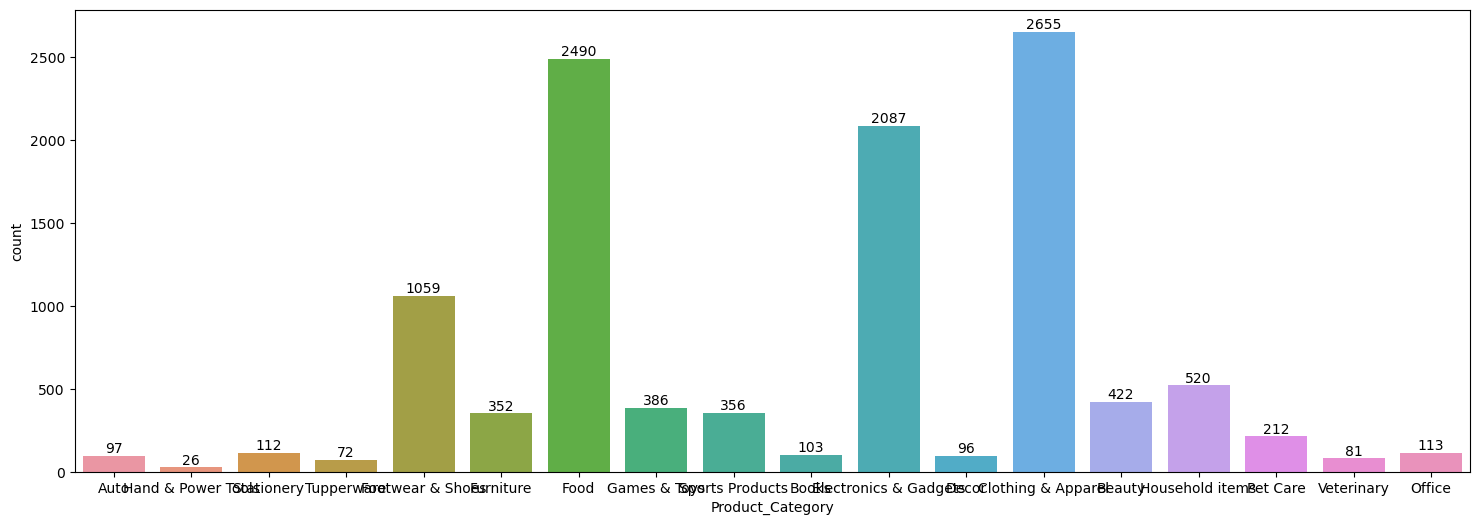

In [92]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data = df,x="Product_Category")
for i in ax.containers:
    ax.bar_label(i)

In [94]:
sales_cat = df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head()
sales_cat.head()

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051


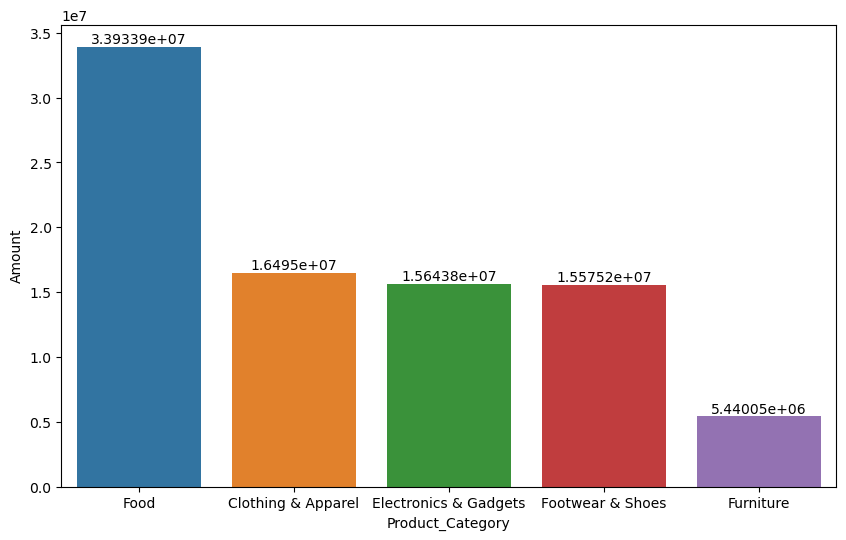

In [96]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data =sales_cat ,x="Product_Category",y="Amount")
for i in ax.containers:
    ax.bar_label(i)

# Most of the Products sold on the bases of orders are Clothing ,Food and Electronics 
# But Most of the Products sold on the bases of Aomunt are Food ,Clothng and Electronics 

In [116]:
sales_id = df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(7)
sales_id.head()

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79


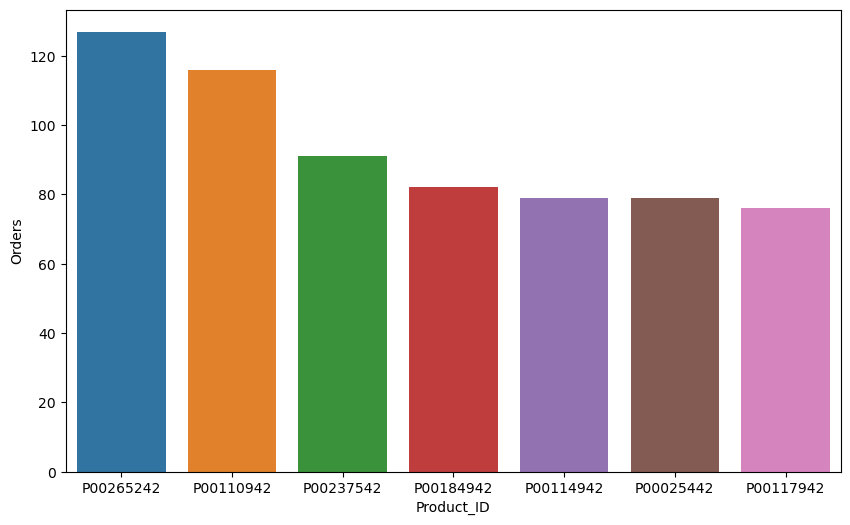

In [118]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=sales_id ,x="Product_ID",y="Orders")

<Axes: xlabel='Product_ID'>

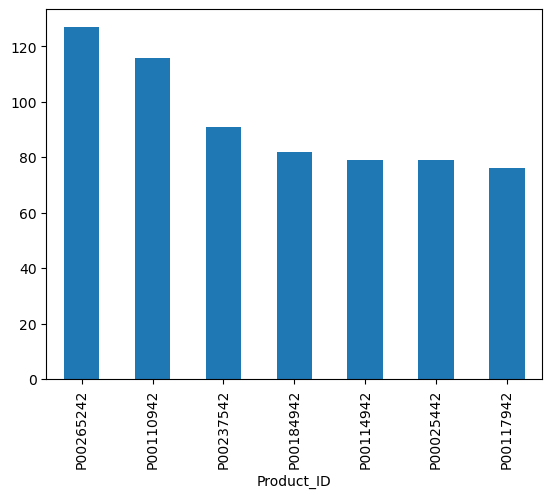

In [134]:
df.groupby("Product_ID")["Orders"].sum().sort_values(ascending=False).head(7).plot(kind="bar")

**Married Womensof age group 26-35 from UP , Maharashtra ,Karnataka working in IT Sector ,HealthCare , and Aviation are more likely to but products from Food , Clothing and Electronics**